In [24]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import os
import math

In [25]:
# Downscale thumbnails to 360p for training
img_size = (168, 94)

def loadImage(path):
	img = Image.open(path, 'r').convert('RGB').resize(img_size)
	# Convert colors from 0-255 to 0-1
	return np.asarray(img) / 255

In [26]:
# AI tries to match target values given source values
source = []
target = []

# Import thumbnails from dataset/ folder
for img in os.listdir('dataset'):
	source.append(loadImage(f'dataset/{img}'))
	views, subs = img[12:-4].split("_")
	views_mag = len(views) - 1
	target.append(views_mag)
	
# Convert to numpy arrays
source = np.array(source)
target = np.array(target)
len(source)

1918

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(source, target, test_size=0.1)

In [48]:
model = keras.models.Sequential(
	[
		keras.Input(shape=(img_size[1], img_size[0], 3)),

		keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='Same', activation='relu'),
		keras.layers.MaxPooling2D(pool_size=2, strides=3),

		keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='Same', activation='relu'),
		keras.layers.MaxPooling2D(pool_size=2, strides=2),

		keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, padding='Same', activation='relu'),
		keras.layers.MaxPooling2D(pool_size=2, strides=2),

		keras.layers.Flatten(),

        keras.layers.Dropout(0.5),

		keras.layers.Dense(512, activation="relu"), # idk whether to activate this

		keras.layers.Dense(10, activation="softmax")
	]
)

# 'mae' seems slightly better than 'mse'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 94, 168, 32)       2432      
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 31, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 31, 56, 64)        51264     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 15, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 15, 28, 128)       204928    
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 7, 14, 128)     

In [47]:
batch_size = 16
epochs = 32

history = model.fit(
	x_train, y_train,
	batch_size=batch_size,
	epochs=epochs,
	validation_data=(x_valid, y_valid),
	steps_per_epoch=len(x_train) // batch_size # num_samples / batch_size
)

Epoch 1/32
107/107 [==============================] - 24s 228ms/step - loss: 1.8825 - val_loss: 1.6647
Epoch 2/32
107/107 [==============================] - 3s 22ms/step - loss: 1.6368 - val_loss: 1.6275
Epoch 3/32
107/107 [==============================] - 2s 21ms/step - loss: 1.5953 - val_loss: 1.5945
Epoch 4/32
107/107 [==============================] - 2s 22ms/step - loss: 1.5853 - val_loss: 1.5692
Epoch 5/32
107/107 [==============================] - 2s 22ms/step - loss: 1.5301 - val_loss: 1.5353
Epoch 6/32
107/107 [==============================] - 2s 14ms/step - loss: 1.5089 - val_loss: 1.5400
Epoch 7/32
107/107 [==============================] - 2s 14ms/step - loss: 1.4692 - val_loss: 1.4975
Epoch 8/32
107/107 [==============================] - 1s 14ms/step - loss: 1.4310 - val_loss: 1.4666
Epoch 9/32
107/107 [==============================] - 2s 14ms/step - loss: 1.4048 - val_loss: 1.4449
Epoch 10/32
107/107 [==============================] - 2s 15ms/step - loss: 1.3750 - val_

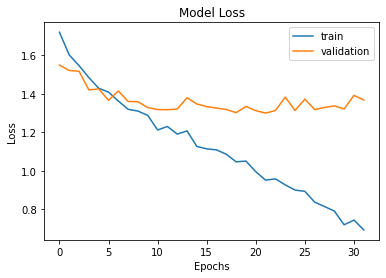

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"])
plt.show()

6/6 [==============================] - 0s 5ms/step


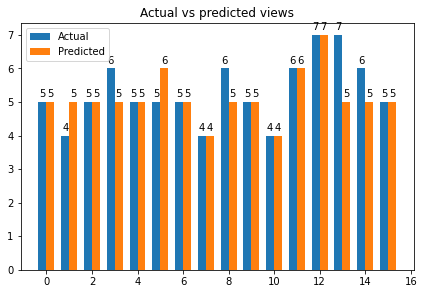

In [ ]:
preds = model.predict(x_valid)
preds = np.argmax(preds, axis=1)
num_results = 16#len(preds)
width = 0.35
fig, ax = plt.subplots()
x = np.arange(num_results)
rects1 = ax.bar(x - width / 2, y_valid[:num_results], width, label='Actual')
rects2 = ax.bar(x + width / 2, preds[:num_results], width, label='Predicted')
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.title("Actual vs predicted views")
plt.show()